# Initial Inspection of the Data Product

Satellite data products can be a weird to deal with. 

The first thing to find out is what kind of grid they are on. If they on a regular grid of latitude and longitude, further processing is much simpler. If not, things can be a bit tricky.

Let's find out.

## Preliminaries

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import contextily as cx

In [3]:
basedir = "data/S3A_OL_2_WFR____20190603T095937_20190603T100237_20190604T203202_0179_045_236_1800_MAR_O_NT_002.SEN3/"
fname = "%s/geo_coordinates.nc" % basedir

In [4]:
with xr.open_dataset(fname) as ds:
    # ds
    print(ds.latitude.values.min())
    print(ds.latitude.values.max())
    print(ds.longitude.values.min())
    print(ds.longitude.values.max())
    lats_flat = ds.latitude.values.flatten()
    lons_flat = ds.longitude.values.flatten()
    print(lons_flat.shape)
    print(lons_flat[::128].shape)

59.964901999999995
73.357038
-3.047676
33.690142
(19902715,)
(155490,)


## Plot Latitude / Longitude Points over Map

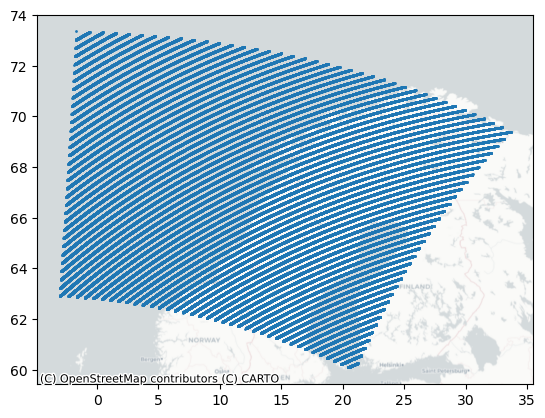

In [5]:
fig, ax = plt.subplots(1,1)
ax.scatter(lons_flat[::128], lats_flat[::128], s=1)
cx.add_basemap(ax, crs='EPSG:4326', source=cx.providers.CartoDB.Positron)
pass

## What now?

It looks like the grid is not regular (in the space of latitude and longitude). This means we need to do additional processing to create files we can easily use for downstream processing (create map tiles, mosaic images, etc).

This is a bit tricky because we do not know the spatial reference system (SRS) of the satellite data. We do, however, know the coordinates (in latitude and longitude) of each pixel.

So, there are two ways of going to a regular grid:

1. Create a rectangular grid (in a spatial reference system we know) and resample onto it.

2. Use the coordinates of the satellite data as ground control points and then reproject onto a target grid.

There also is a secret third option:

3. Use a library that abstracts all the reading and transformations for us.

We follow third option in `./05_reproject_and_export_as_geotiff.ipynb`.